In [2]:
import numpy as np             #import the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('data.csv')   #read the data set

In [3]:
data.drop(['ID','Speed_10'],axis=1,inplace=True)  #remove the unnecessary coloumn

In [4]:
data.rename(columns={'Speed_01 (m/sec)':'Average walking speed (m/s)'}, inplace=True)  #rename the coloumn

In [5]:
data   #visualizing the data set

,Study,Group,Gender,Age,Height (meters),Weight (kg),HoehnYahr,UPDRS,UPDRSM,TUAG,Average walking speed (m/s)
0,Ga,PD,female,82,1.45,50,3.0,20,10,36.34,0.6635
1,Ga,PD,male,68,1.71,78,2.5,25,8,11.00,0.6420
2,Ga,PD,female,82,1.53,51,2.5,24,5,14.50,0.9080
3,Ga,PD,male,72,1.70,82,2.0,16,13,10.47,0.8480
4,Ga,PD,female,53,1.67,54,3.0,44,22,18.34,0.6770
...,...,...,...,...,...,...,...,...,...,...,...
161,Si,CO,male,60,1.74,72,0.0,0,0,9.20,1.0000
162,Si,CO,male,67,1.90,95,0.0,0,0,12.52,1.1200
163,Si,CO,male,61,1.70,72,0.0,0,0,12.65,0.9900
164,Si,CO,male,53,1.70,87,0.0,0,0,11.41,1.2900


<Figure size 720x1080 with 0 Axes>

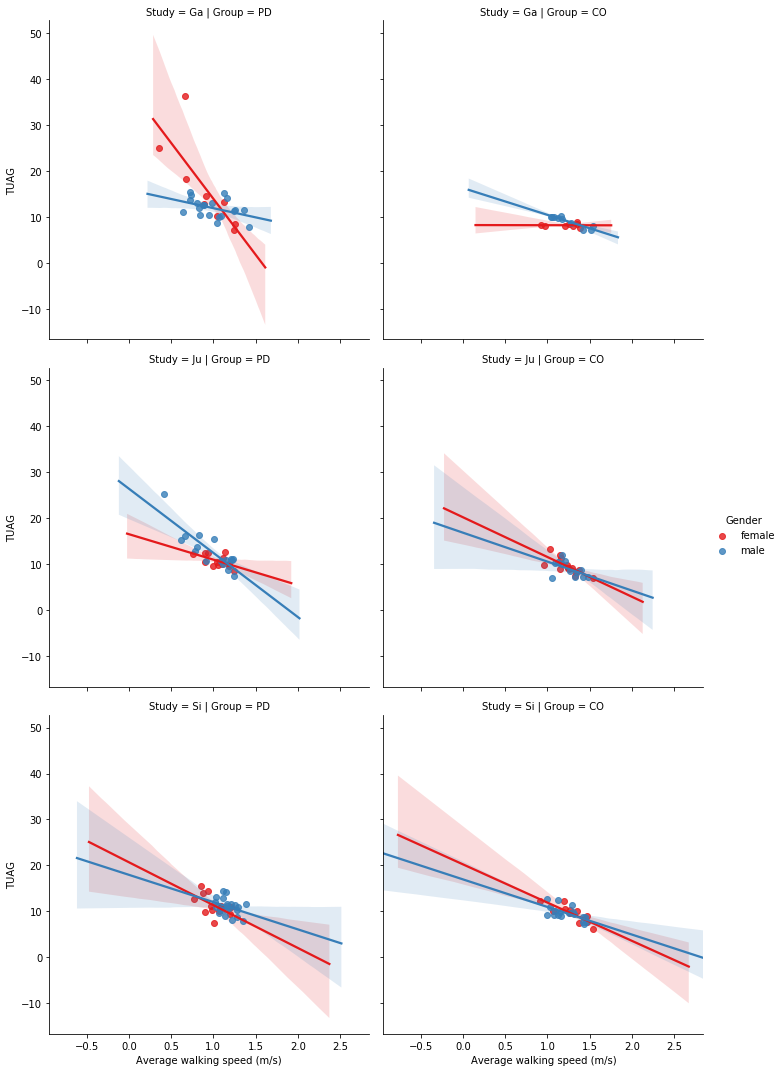

In [6]:
plt.figure(figsize=(10,15))  #fetures plot to analyze the data behaviour

sns.lmplot(y='TUAG',x='Average walking speed (m/s)',data=data, hue='Gender',
          col='Group',palette='Set1',row='Study')

Text(0, 0.5, 'frequency')

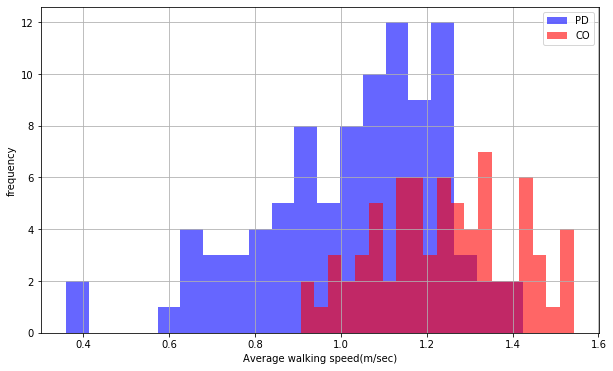

In [7]:
plt.figure(figsize=(10,6))    #histogram analuze of average walking speed
data[data['Group']=='PD']['Average walking speed (m/s)'].hist(bins = 20,color='blue',label = 'PD',alpha= 0.6)
data[data['Group']=='CO']['Average walking speed (m/s)'].hist(bins = 20,color='red',label = 'CO',alpha= 0.6)
plt.legend()
plt.xlabel('Average walking speed(m/sec)')
plt.ylabel('frequency')

Text(0, 0.5, 'frequency')

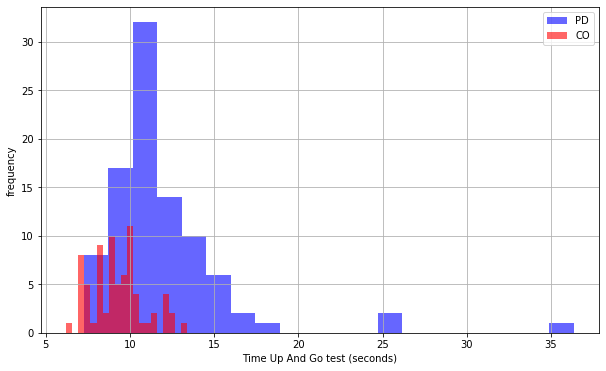

In [8]:
plt.figure(figsize=(10,6))  #histogram analuze of TUAG test
data[data['Group']=='PD']['TUAG'].hist(bins = 20,color='blue',label = 'PD',alpha= 0.6)
data[data['Group']=='CO']['TUAG'].hist(bins = 20,color='red',label = 'CO',alpha= 0.6)
plt.legend()
plt.xlabel('Time Up And Go test (seconds)')
plt.ylabel('frequency')

In [9]:
Gend = pd.get_dummies(data['Gender'],drop_first=True)  #gender is converted into numerical values

In [10]:
Stud=pd.get_dummies(data['Study'])  #study is converted into numerical values

In [11]:
Grou=pd.get_dummies(data['Group'],drop_first=True) #group(Ga,Ju,Si) is converted into numerical values

In [12]:
data.drop(['Gender','Study','Group'],axis=1,inplace=True) #drop the features to convert into numerical values

In [13]:
data = pd.concat([data,Gend,Stud,Grou],axis=1) #The new numerical features were replaced

In [14]:
data.drop(['Weight (kg)','HoehnYahr','UPDRS','UPDRSM'],axis = 1,inplace = True) #drop the unnecessary features

In [15]:
X = data.drop(['PD'], axis = 1) #define the features as X 

In [16]:
y = data['PD'] #define the label as Y

In [17]:
from sklearn.model_selection import train_test_split #import the data selection libraries

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5) #data seperation for training testing

In [19]:
#Decision tree classifier

In [20]:
from sklearn.tree import DecisionTreeClassifier #import the Decision tree algorithm

In [21]:
dtree = DecisionTreeClassifier() #define the name of the algorithm

In [22]:
dtree.fit(X_train,y_train) #fit the dataset with decision tree algorithm

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [23]:
predictions = dtree.predict(X_test) #test the performance of the algorithm

In [24]:
from sklearn.metrics import classification_report,confusion_matrix #import the performance evaluavtion matrices

In [26]:
print(classification_report(y_test,predictions))  #print the performance of the algorithm
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.50      0.40      0.44        20
           1       0.65      0.73      0.69        30

    accuracy                           0.60        50
   macro avg       0.57      0.57      0.57        50
weighted avg       0.59      0.60      0.59        50

[[ 8 12]
 [ 8 22]]


In [27]:
cm = confusion_matrix(y_test, predictions) #define the confusion matrix as cm

(2, 0)

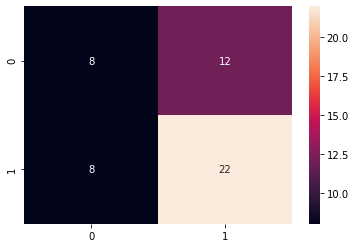

In [28]:
sns.heatmap(cm, annot=True)     #visualize the confusion matrix
plt.ylim(2,0)

In [30]:
#Random forest

In [31]:
from sklearn.ensemble import RandomForestClassifier     #import the random forest algorithm

In [33]:
rfc = RandomForestClassifier(n_estimators=300)    #define the algorithm parameters

In [34]:
rfc.fit(X_train,y_train)  #data fitting for trainiing 

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [35]:
predictions = rfc.predict(X_test)    #testing the model performance

In [36]:
print(classification_report(y_test,predictions)) #print the performance of the algorithm
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.55      0.55      0.55        20
           1       0.70      0.70      0.70        30

    accuracy                           0.64        50
   macro avg       0.62      0.62      0.62        50
weighted avg       0.64      0.64      0.64        50

[[11  9]
 [ 9 21]]


In [37]:
cm = confusion_matrix(y_test, predictions) #define the confusion matrix as cm

(2, 0)

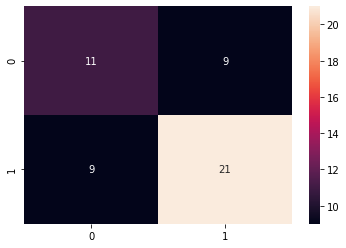

In [38]:
sns.heatmap(cm, annot=True)   #visualize the confusion matrix
plt.ylim(2,0)